# IMPORTS 

In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef

from math import sqrt

# PREPROCESSING
Importing dataset

In [2]:
cancerdf = pd.read_csv('cancer_classification.csv')

Printing head

In [3]:
print(cancerdf.head(10))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

Getting more info

In [4]:
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Getting statistics info

In [6]:
print(cancerdf.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

Checking nulls in dataset

In [8]:
cancerdf.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

Renaming classification column to a more reasonable name

In [9]:
cancerdf = cancerdf.rename(columns={'benign_0__mal_1': 'is_tumor_malignant'})

# VISUALIZING
Tumor type count

is_tumor_malignant
1    357
0    212
Name: count, dtype: int64


Text(0, 0.5, 'Count')

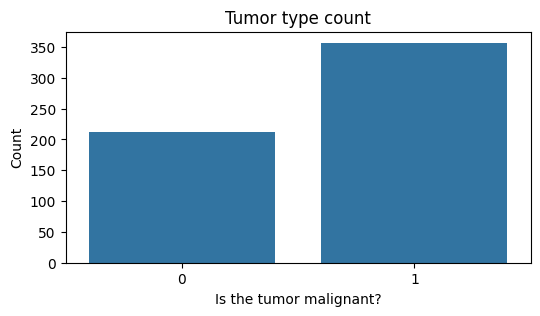

In [13]:
print(cancerdf['is_tumor_malignant'].value_counts())

plt.figure(figsize=(6,3))
sns.countplot(data=cancerdf, x='is_tumor_malignant')
plt.title('Tumor type count')
plt.xlabel('Is the tumor malignant?')
plt.ylabel('Count')

# Most tumors are malignant

The distibution of the tumors' area

Text(0.5, 0, 'Distribution of Mean Area')

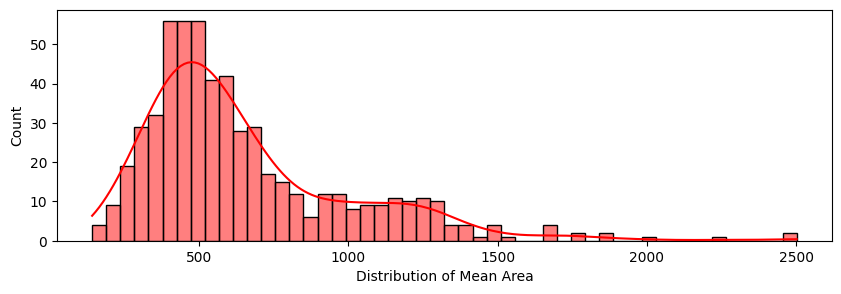

In [19]:
plt.figure(figsize=(10,3))
sns.histplot(data=cancerdf, x='mean area', kde=True, color='r', bins=50)
plt.xlabel('Distribution of Mean Area')

Area x Symmetry relation

Text(0, 0.5, 'Mean Area')

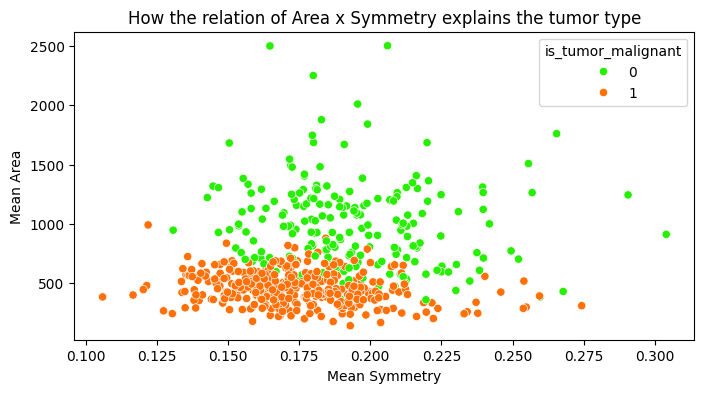

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=cancerdf, x='mean symmetry', y='mean area', hue='is_tumor_malignant', palette='gist_ncar')
plt.title('How the relation of Area x Symmetry explains the tumor type')
plt.xlabel('Mean Symmetry')
plt.ylabel('Mean Area')

Tumor correlations analysis

Text(0.5, 1.0, 'Correlations to the type of tumor')

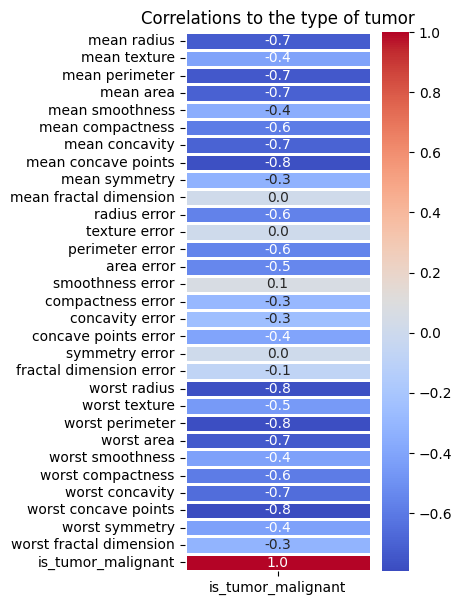

In [53]:
plt.figure(figsize=(3, 7))  
sns.heatmap(data=cancerdf.corr()['is_tumor_malignant'].to_frame(), 
            annot=True, 
            linewidths=1, 
            fmt='.1f', 
            cmap='coolwarm')
plt.title('Correlations to the type of tumor')

# Low correlations, but KNN is good with non-linear data 

# AI
scaling data

In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancerdf.drop('is_tumor_malignant', axis=1))

In [62]:
cancerdf_final = pd.DataFrame(data=scaled_data, columns=cancerdf.drop('is_tumor_malignant', axis=1).columns, index=cancerdf.index)
cancerdf_final = pd.concat([cancerdf_final, cancerdf['is_tumor_malignant']], axis=1)

Data separation

In [65]:
X = cancerdf_final.drop('is_tumor_malignant', axis=1)
y = cancerdf_final['is_tumor_malignant']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
# choice for odd k
sqrt(len(y_test))

13.711309200802088

Instantiating and training

In [69]:
knn = KNeighborsClassifier(n_neighbors=13, p=2)

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [71]:
predictions = knn.predict(X_test)

c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [73]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[ 61   6]
 [  3 118]]


In [74]:
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.95      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



In [75]:
print(f'Matthews Correlation Coefficient: {matthews_corrcoef(y_test, predictions):.2f}')

Matthews Correlation Coefficient: 0.90
